# Projets de prédiction du diabéte avec le machine learning supervisé

## 1. Chargement des données

In [6]:
# Importation des packages
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [7]:
#getting the path to the dataset
os.getcwd()

"/Users/bintoudiop/Documents/Dossier d'école/Formation data analytics/Introduction python/projet oython/Application"

import dataframe .csv format

In [8]:
df =  pd.read_csv("/Users/bintoudiop/Documents/Dossier d'école/Formation data analytics/Introduction python/projet oython/Application/diabetes.csv")
df.head() # affiche les 5 premiers valeurs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies : Nombre de grossesses; 
DiabetesPredigreeFunction : Antécédents familiaux de diabète; 
outcome : 0 = pas de diabète, 1 = diabète

In [9]:
print("Informations générales sur les colonnes :")
df.info() # # Afficher des informations générales sur les colonnes

Informations générales sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Afficher des statistiques descriptives sur les données numériques
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Nettoyage des données

Vérification sur les données  si elles contiennent des valeurs manquantes,des erreurs...

#### 2.1 Est ce que le dataset contient des valeurs nulles par colonne( NaN))? 

In [11]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 2.2 Nettoyage des valeurs incohérentes

D'après les réponses précédentes, on remarque qu’il n’y a pas de valeurs manquantes. Cependant, certaines colonnes comme Glucose, BloodPressure, SkinThickness, Insulin et BMI contiennent des zéros, ce qui semble étrange. Dans le contexte des mesures médicales, des valeurs égales à zéro pour ces caractéristiques sont irréalistes. De plus, la colonne Outcome, qui représente le diagnostic (0 ou 1), contient aussi des zéros, ce qui pourrait fausser les résultats si ce n’est pas pris en compte. Il est donc crucial de remplacer ces valeurs suspectes par des valeurs plus réalistes, comme la médiane, pour garantir que notre modèle soit basé sur des données cohérentes et fiables.

In [12]:
# Les zéros dans ces colonnes sont suspects
colonnes_a_corriger = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in colonnes_a_corriger:
    mediane = df[df[col] != 0][col].median() # On calcule la médiane des valeurs non nulles
    df[col] = df[col].replace(0, mediane)  # On remplace les zéros par cette médiane (car zéro n'est pas une valeur réaliste ici)


print("Nombre de zéros après correction :") # Vérification rapide que les zéros ont bien été remplacés
print((df[colonnes_a_corriger] == 0).sum())

Nombre de zéros après correction :
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


Maintenant aucune de ces colonnes ne contient la valeur 0

### 2.3  Vérification des outliers


Outliers pour la colonne 'Pregnancies' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30      125  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


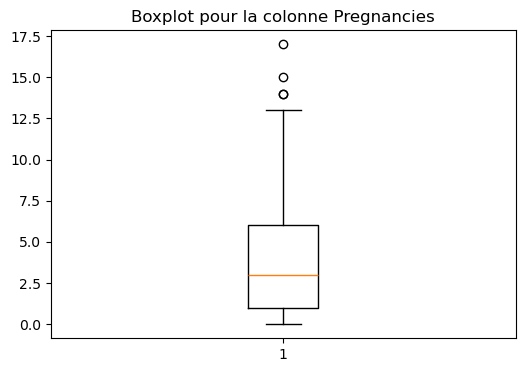


Outliers pour la colonne 'Glucose' :
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


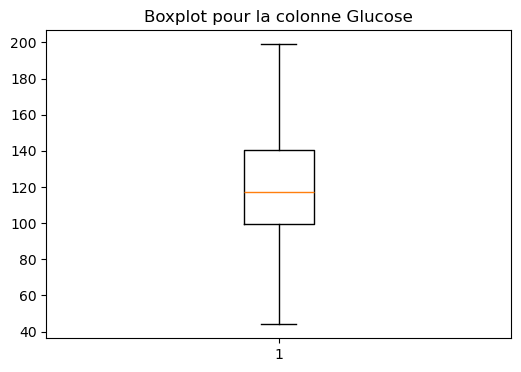


Outliers pour la colonne 'BloodPressure' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
84             5      137            108             29      125  48.8   
106            1       96            122             29      125  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
362            5      103            108             37      125  39.2   
549            4      189            110             31      125  28.5   
597            1       89             24             19       25  27.8   
599            1      109             38             18      120  23.1   
658           11      127            106             29      125  39.0   
662            8      167            106             46      231  37

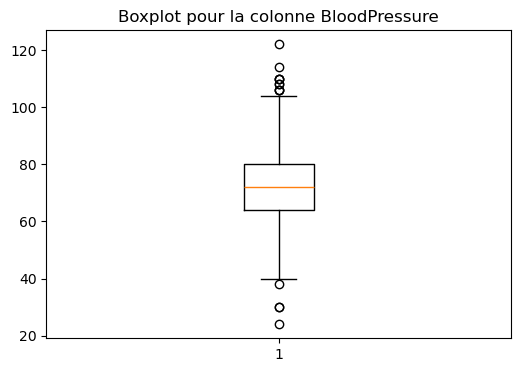


Outliers pour la colonne 'SkinThickness' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
16             0      118             84             47      230  45.8   
32             3       88             58             11       54  24.8   
39             4      111             72             47      207  37.1   
50             1      103             80             11       82  19.4   
..           ...      ...            ...            ...      ...   ...   
698            4      127             88             11      155  34.5   
710            3      158             64             13      387  31.2   
718            1      108             60             46      178  35.5   
753            0      181             88             44      510  43.3   
763           10      101             76             48      180  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
8                    

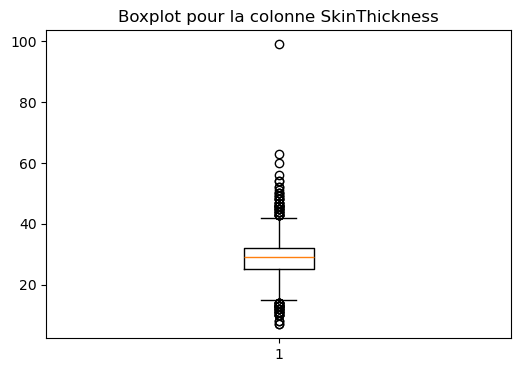


Outliers pour la colonne 'Insulin' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.1

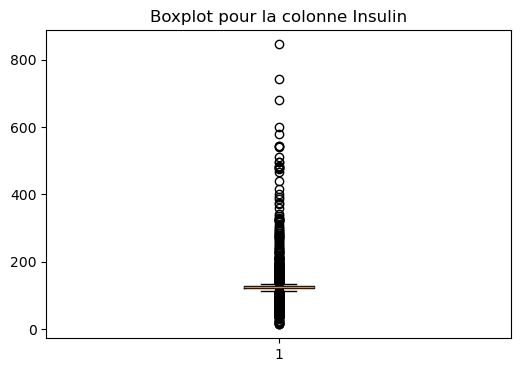


Outliers pour la colonne 'BMI' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
120            0      162             76             56      100  53.2   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
193           11      135             72             29      125  52.3   
247            0      165             90             33      680  52.3   
303            5      115             98             29      125  52.9   
445            0      180             78             63       14  59.4   
673            3      123            100             35      240  57.3   

     DiabetesPedigreeFunction  Age  Outcome  
120                     0.759   25        1  
125                     0.496   26        1  
177                     0.319   26        1  
193                     0.578   40        1  
247                     0.427   23        0  
303                    

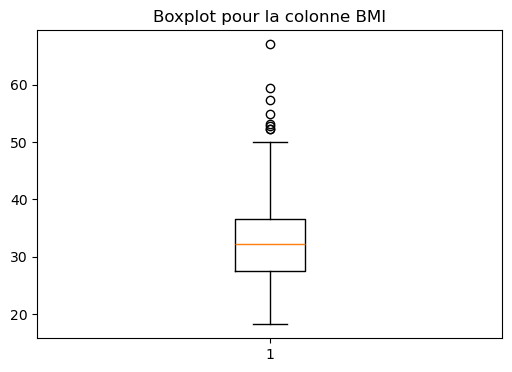


Outliers pour la colonne 'DiabetesPedigreeFunction' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
12            10      139             80             29      125  27.1   
39             4      111             72             47      207  37.1   
45             0      180             66             39      125  42.0   
58             0      146             82             29      125  40.5   
100            1      163             72             29      125  39.0   
147            2      106             64             35      119  30.5   
187            1      128             98             41       58  32.0   
218            5       85             74             22      125  29.0   
228            4      197             70             39      744  36.7   
243            6      119             50             22      176  27.1   
245            9      184             85             15  

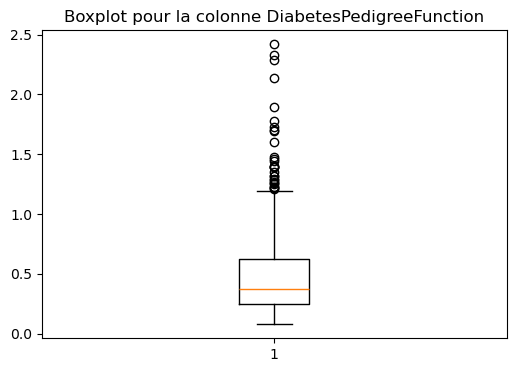


Outliers pour la colonne 'Age' :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
123            5      132             80             29      125  26.8   
363            4      146             78             29      125  38.5   
453            2      119             72             29      125  19.6   
459            9      134             74             33       60  25.9   
489            8      194             80             29      125  26.1   
537            0       57             60             29      125  21.7   
666            4      145             82             18      125  32.5   
674            8       91             82             29      125  35.6   
684            5      136             82             29      125  32.3   

     DiabetesPedigreeFunction  Age  Outcome  
123                     0.186   69        0  
363                     0.520   67        1  
453                     0.832   72        0  
459                     0.460   81       

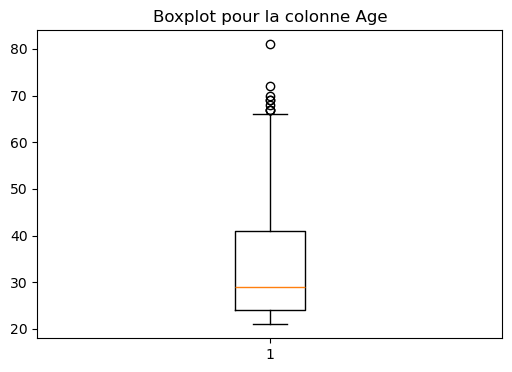


Outliers pour la colonne 'Outcome' :
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


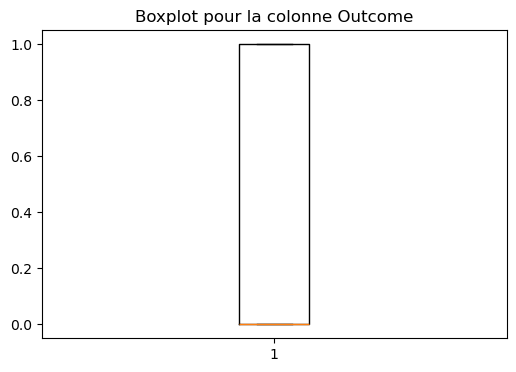

In [13]:
# Liste des colonnes à vérifier pour les outliers
varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Détection des outliers avec la méthode IQR (Interquartile Range)
for col in varlist:
    # Calcul des quartiles Q1 et Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calcul de l'IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calcul des bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers : valeurs en dehors des bornes
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Affichage des résultats
    print(f"\nOutliers pour la colonne '{col}' :")
    print(outliers)
    
    # Afficher un boxplot pour visualiser les outliers
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot pour la colonne {col}')
    plt.show()

il y a des valeurs aberrantes dans plusieurs colonnes comme SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, et Age. Pour les valeurs de Outcome, il n’y a pas de valeurs aberrantes.

### 2.3.1 Vérification si ces outliers sont significatifs ou pas

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Création d'une copie du DataFrame sans outliers
df_no_outliers = df.copy()
for col in varlist[:-1]:  # On exclut 'Outcome'
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

X_no_outliers = df_no_outliers.drop('Outcome', axis=1)
Y_no_outliers = df_no_outliers['Outcome']


# Validation croisée
score_avec = cross_val_score(LogisticRegression(max_iter=10000), X, Y, cv=5).mean()
score_sans = cross_val_score(LogisticRegression(max_iter=10000), X_no_outliers, Y_no_outliers, cv=5).mean()

print("Validation croisée avec outliers :", round(score_avec, 4))
print("Validation croisée sans outliers :", round(score_sans, 4))

Validation croisée avec outliers : 0.7722
Validation croisée sans outliers : 0.7441


La validation croisée sans outliers est légèrement inférieure à celle avec les outliers. 
il semble que les outliers n’ont pas d’impact significatif sur les résultats.

# 3. Entraînement du modèle de machine learning

Je veux entraîner un modèle de machine learning avec les données du diabète. J’ai déjà nettoyé les données, j’ai décidé de garder les outliers car ils ne nuisent pas vraiment aux performances. Maintenant, je passe à l’entraînement.

In [31]:
# Je divise les données en un ensemble d’entraînement(80%) et un ensemble de test(20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Puis je choisi un modèle de classification  pour l’instant, je pars sur un RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [33]:
# Je l'entraîne avec les données d'entraînement
model.fit(X_train, y_train)	

RandomForestClassifier(random_state=42)

In [34]:
# J'évalue sa performance sur les données de test (accuracy, matrice de confusion…)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Je fais les prédictions
y_pred = model.predict(X_test)

# Je mesure la performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

# Matrice de confusion pour voir les erreurs
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Rapport de classification
print("Rapport :\n", classification_report(y_test, y_pred))

Accuracy : 0.7467532467532467
Matrice de confusion :
 [[78 21]
 [18 37]]
Rapport :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



- Accuracy globale : Environ 75%
- Classe 0 (pas diabétique) et Classe 1 (diabétique) 
Le modèle a bien appris à partir des données. Il est capable de prédire correctement 75% des cas, ce qui est un bon début. Cependant, on remarque que les prédictions pour la classe ‘1’ (diabétiques) sont un peu moins précises, avec une précision de 64%. On pourrait améliorer ça en ajustant les paramètres du modèle ou en explorant d’autres modèles. 

# 4. Sauvegarde du modèle

In [35]:
import joblib
joblib.dump(model, 'diabetes_model.pkl') # sauvegarde du modèle

['diabetes_model.pkl']